In [127]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    '''Sigmoid function'''
    return 1 / (1+np.exp(-x))

def mse(y_true, y_pred):
    '''Mean Squared Error'''
    return ((y_true - y_pred) ** 2).mean()

def sigmoid_derv(x):
    '''Derivative of sigmoid function'''
    f_x = sigmoid(x)
    return f_x*(1-f_x)

class NeuralNetwork1:
    def __init__(self):
        '''Initialize weights and biases with random values'''
        # weights
        for i in range(1,9):
            setattr(self, 'w'+str(i), np.random.normal())
        
        # biases
        for i in range(1,4):
            setattr(self, 'b'+str(i), np.random.normal())
        
    def feedforward(self, inputs):
        h1 = sigmoid( self.w1*inputs[0] + self.w2*inputs[1] + self.b1)
        h2 = sigmoid( self.w4*inputs[0] + self.w5*inputs[1] + self.b2)
        o1 = sigmoid( self.w7*h1 + self.w8*h2 + self.b3)
        return o1
    
    def train(self, train_data, ground_truth):
        ''' 
        train_data is a n x 3 numpy array where n is the number of samples in the dataset
        ground_truth is a numpy array with n elems.
        All data units in ground_truth represent the true values of the data
        '''
        x_epoch = []
        y_loss = []
        
        learning_rate = 0.10
        epochs = 1000 # total number of iterations to loop through the entire dataset
        
        for epoch in range(epochs):
            for x, y_true in zip(train_data, ground_truth):
                '''Compute feedforwards for all neurons'''                
                add_h1 = self.w1*x[0] + self.w2*x[1] + self.b1
                h1 = sigmoid(add_h1)
                add_h2 = self.w4*x[0] + self.w5*x[1] + self.b2
                h2 = sigmoid(add_h2)
                add_o1 = self.w7*h1 + self.w8*h2 + self.b3
                o1 = sigmoid(add_o1)
                y_pred = o1
                
                '''Computing Partial derivates'''
                # derv_L_ypred represents partial derivative of dL / dy_pred
                derv_L_ypred = -2*(y_true-y_pred)
                       
                # Neuron o1
                derv_ypred_w7 = h1 * sigmoid_derv(add_o1)
                derv_ypred_w8 = h2 * sigmoid_derv(add_o1)
                derv_ypred_b3 = sigmoid_derv(add_o1)
                derv_ypred_h1 = self.w7 * sigmoid_derv(add_o1)
                derv_ypred_h2 = self.w8 * sigmoid_derv(add_o1)
            
                # Neuron h1
                derv_h1_w1 = x[0] * sigmoid_derv(add_h1)
                derv_h1_w2 = x[1] * sigmoid_derv(add_h1)
                derv_h1_b1 = sigmoid_derv(add_h1)
                
                # Neuron h2
                derv_h2_w4 = x[0] * sigmoid_derv(add_h2)
                derv_h2_w5 = x[1] * sigmoid_derv(add_h2)
                derv_h2_b2 = sigmoid_derv(add_h2)
            
                # Neuron h1
                self.w1 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_w1
                self.w2 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_w2
                self.b1 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_b1

                # Neuron h2
                self.w4 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_w4
                self.w5 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_w5
                self.b2 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_b2
                
                # Neuron o1
                self.w7 -= learning_rate * derv_L_ypred * derv_ypred_w7
                self.w8 -= learning_rate * derv_L_ypred * derv_ypred_w8
                self.b3 -= learning_rate * derv_L_ypred * derv_ypred_b3
                    
            '''Calculating the loss for groups of ten epochs'''
            if epoch % 10 == 0:
                y_prediction = np.apply_along_axis(self.feedforward, 1, train_data)
                loss = mse(ground_truth, y_prediction)
#                 print("Epoch: %d and loss: %.3f" % (epoch, loss))
                x_epoch.append(epoch)
                y_loss.append(loss)
        
        plt.plot(x_epoch, y_loss)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    

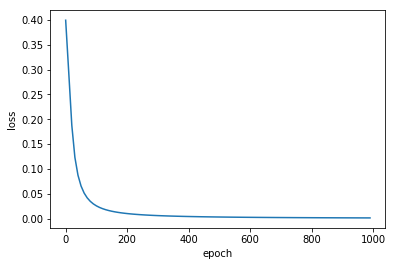

In [128]:
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  0, # Alice
  1, # Bob
  1, # Charlie
  0, # Diana
])

# Train our neural network!
n1 = NeuralNetwork1()
n1.train(data, all_y_trues)

In [130]:
# Making a prediction with our neural network
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.953 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.961 - M

Emily: 0.053
Frank: 0.961


In [134]:
# Adding a third input age
# Higher probability of getting stuck in a local minima

class NeuralNetwork2:
    def __init__(self):
        '''Initialize weights and biases with random values'''
        # weights
        for i in range(1,9):
            setattr(self, 'w'+str(i), np.random.normal())
        
        # biases
        for i in range(1,4):
            setattr(self, 'b'+str(i), np.random.normal())
        
    def feedforward(self, inputs):
        h1 = sigmoid( self.w1*inputs[0] + self.w2*inputs[1] + self.w3*inputs[2] + self.b1)
        h2 = sigmoid( self.w4*inputs[0] + self.w5*inputs[1] + self.w6*inputs[2] + self.b2)
        o1 = sigmoid( self.w7*h1 + self.w8*h2 + self.b3)
        return o1
    
    def train(self, train_data, ground_truth):
        ''' 
        train_data is a n x 3 numpy array where n is the number of samples in the dataset
        ground_truth is a numpy array with n elems.
        All data units in ground_truth represent the true values of the data
        '''
        learning_rate = 0.10
        epochs = 1000 # total number of iterations to loop through the entire dataset
        x_epoch = []
        y_loss = []
        
        for epoch in range(epochs):
            for x, y_true in zip(train_data, ground_truth):
                '''Compute feedforwards for all neurons'''
                
                add_h1 = self.w1*x[0] + self.w2*x[1] + self.w3*x[2] + self.b1
                h1 = sigmoid(add_h1)
                add_h2 = self.w4*x[0] + self.w5*x[1] + self.w6*x[2] + self.b2
                h2 = sigmoid(add_h2)
                add_o1 = self.w7*h1 + self.w8*h2 + self.b3
                o1 = sigmoid(add_o1)
                y_pred = o1
                
                '''Computing Partial derivates'''
                # derv_L_ypred represents partial derivative of dL / dy_pred
                derv_L_ypred = -2*(y_true-y_pred)
                       
                # Neuron o1
                derv_ypred_w7 = h1 * sigmoid_derv(add_o1)
                derv_ypred_w8 = h2 * sigmoid_derv(add_o1)
                derv_ypred_b3 = sigmoid_derv(add_o1)
                derv_ypred_h1 = self.w7 * sigmoid_derv(add_o1)
                derv_ypred_h2 = self.w8 * sigmoid_derv(add_o1)
            
                # Neuron h1
                derv_h1_w1 = x[0] * sigmoid_derv(add_h1)
                derv_h1_w2 = x[1] * sigmoid_derv(add_h1)
                derv_h1_w3 = x[2] * sigmoid_derv(add_h1)
                derv_h1_b1 = sigmoid_derv(add_h1)
                
                # Neuron h2
                derv_h2_w4 = x[0] * sigmoid_derv(add_h2)
                derv_h2_w5 = x[1] * sigmoid_derv(add_h2)
                derv_h2_w6 = x[2] * sigmoid_derv(add_h2)
                derv_h2_b2 = sigmoid_derv(add_h2)
            
                # Neuron h1
                self.w1 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_w1
                self.w2 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_w2
                self.w3 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_w3
                self.b1 -= learning_rate * derv_L_ypred * derv_ypred_h1 * derv_h1_b1

                # Neuron h2
                self.w4 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_w4
                self.w5 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_w5
                self.w6 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_w6
                self.b2 -= learning_rate * derv_L_ypred * derv_ypred_h2 * derv_h2_b2
                
                # Neuron o1
                self.w7 -= learning_rate * derv_L_ypred * derv_ypred_w7
                self.w8 -= learning_rate * derv_L_ypred * derv_ypred_w8
                self.b3 -= learning_rate * derv_L_ypred * derv_ypred_b3
                    
            '''Calculating the loss for groups of ten epochs'''
            if epoch % 10 == 0:
                y_prediction = np.apply_along_axis(self.feedforward, 1, train_data)
                loss = mse(ground_truth, y_prediction)
#                 print("Epoch: %d and loss: %.3f" % (epoch, loss))
                x_epoch.append(epoch)
                y_loss.append(loss)
        
        plt.plot(x_epoch, y_loss)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    

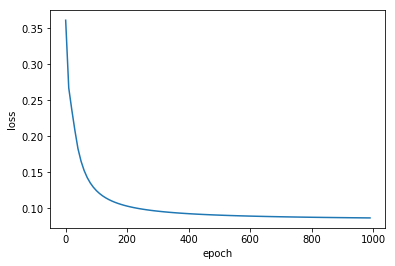

In [136]:
train_data = np.array([[10, 2, 10], [9, -9, 10], [8, -14, 12], [10, -8, -12], [9, -4, -2], [11, 17, -18]])
ground_truth = np.array([1, 0, 0, 1, 0, 1])

n2 = NeuralNetwork2()
n2.train(train_data, ground_truth)